In [52]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

**PREPROCESSING**

In [53]:
path = "arguments-training.tsv"
df = pd.read_table(path, sep = "\t")
df.head()

Argument ID                                   Conclusion       Stance  \
0      A01002                  We should ban human cloning  in favor of   
1      A01005                      We should ban fast food  in favor of   
2      A01006  We should end the use of economic sanctions      against   
3      A01007         We should abolish capital punishment      against   
4      A01008                We should ban factory farming      against   

                                             Premise  
0  we should ban human cloning as it will only ca...  
1  fast food should be banned because it is reall...  
2  sometimes economic sanctions are the only thin...  
3  capital punishment is sometimes the only optio...  
4  factory farming allows for the production of c...

In [54]:
# renaming the Argument ID column so that there is no space
df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [55]:
l_path = "labels-training.tsv"
temp_labels_df = pd.read_table(l_path, sep="\t")
temp_labels_df.head()

Argument ID  Self-direction: thought  Self-direction: action  Stimulation  \
0      A01002                        0                       0            0   
1      A01005                        0                       0            0   
2      A01006                        0                       0            0   
3      A01007                        0                       0            0   
4      A01008                        0                       0            0   

   Hedonism  Achievement  Power: dominance  Power: resources  Face  \
0         0            0                 0                 0     0   
1         0            0                 0                 0     0   
2         0            0                 1                 0     0   
3         0            0                 0                 0     0   
4         0            0                 0                 0     0   

   Security: personal  Security: societal  Tradition  Conformity: rules  \
0                   0                   1          0                  0   
1                   1                   0          0                  0   
2                   0                   1          0                  0   
3                   0                   1          0                  1   
4                   1                   0          0                  0   

   Conformity: interpersonal  Humility  Benevolence: caring  \
0                          0         0                    0   
1                          0         0                    0   
2                          0         0                    0   
3                          0         0                    0   
4                          0         0                    1   

   Benevolence: dependability  Universalism: concern  Universalism: nature  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      1                     0   
4                           0                      1                     0   

   Universalism: tolerance  Universalism: objectivity  
0                        0                          0  
1                        0                          0  
2                        0                          0  
3                        0                          0  
4                        0                          0

In [56]:
# renaming the Argument ID column so that there is no space
temp_labels_df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [57]:
pd.set_option('display.max_columns', None)
temp_labels_df.head()

Argument_ID  Self-direction: thought  Self-direction: action  Stimulation  \
0      A01002                        0                       0            0   
1      A01005                        0                       0            0   
2      A01006                        0                       0            0   
3      A01007                        0                       0            0   
4      A01008                        0                       0            0   

   Hedonism  Achievement  Power: dominance  Power: resources  Face  \
0         0            0                 0                 0     0   
1         0            0                 0                 0     0   
2         0            0                 1                 0     0   
3         0            0                 0                 0     0   
4         0            0                 0                 0     0   

   Security: personal  Security: societal  Tradition  Conformity: rules  \
0                   0                   1          0                  0   
1                   1                   0          0                  0   
2                   0                   1          0                  0   
3                   0                   1          0                  1   
4                   1                   0          0                  0   

   Conformity: interpersonal  Humility  Benevolence: caring  \
0                          0         0                    0   
1                          0         0                    0   
2                          0         0                    0   
3                          0         0                    0   
4                          0         0                    1   

   Benevolence: dependability  Universalism: concern  Universalism: nature  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      1                     0   
4                           0                      1                     0   

   Universalism: tolerance  Universalism: objectivity  
0                        0                          0  
1                        0                          0  
2                        0                          0  
3                        0                          0  
4                        0                          0

In [58]:
labels_dicts = temp_labels_df.to_dict(orient = "records")
labels_dicts

[{'Argument_ID': 'A01002',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 0,
  'Security: societal': 1,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,
  'Universalism: nature': 0,
  'Universalism: tolerance': 0,
  'Universalism: objectivity': 0},
 {'Argument_ID': 'A01005',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 1,
  'Security: societal': 0,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,


In [59]:
# create a list of the labels for each argument
labels_list = [[labels for labels in dic if dic[labels] == 1] for dic in labels_dicts]
# labels_list

In [60]:
# label the data using a common identifier
training_data=pd.merge(df, temp_labels_df, on="Argument_ID")

In [61]:
training_data

Argument_ID                                         Conclusion  \
0         A01002                        We should ban human cloning   
1         A01005                            We should ban fast food   
2         A01006        We should end the use of economic sanctions   
3         A01007               We should abolish capital punishment   
4         A01008                      We should ban factory farming   
...          ...                                                ...   
5388      E08016  The EU should integrate the armed forces of it...   
5389      E08017  Food whose production has been subsidized with...   
5390      E08018  Food whose production has been subsidized with...   
5391      E08019  Food whose production has been subsidized with...   
5392      E08020  The EU should integrate the armed forces of it...   

           Stance                                            Premise  \
0     in favor of  we should ban human cloning as it will only ca...   
1     in favor of  fast food should be banned because it is reall...   
2         against  sometimes economic sanctions are the only thin...   
3         against  capital punishment is sometimes the only optio...   
4         against  factory farming allows for the production of c...   
...           ...                                                ...   
5388  in favor of  On the one hand, we have Russia killing countl...   
5389  in favor of  The subsidies were originally intended to ensu...   
5390  in favor of  These products come mainly from large enterpri...   
5391  in favor of  Subsidies often make farmers in recipient coun...   
5392  in favor of  The EU cannot endlessly lean on America or NAT...   

      Self-direction: thought  Self-direction: action  Stimulation  Hedonism  \
0                           0                       0            0         0   
1                           0                       0            0         0   
2                           0                       0            0         0   
3                           0                       0            0         0   
4                           0                       0            0         0   
...                       ...                     ...          ...       ...   
5388                        0                       0            0         0   
5389                        0                       0            0         0   
5390                        0                       0            0         0   
5391                        0                       0            0         0   
5392                        0                       1            0         0   

      Achievement  Power: dominance  Power: resources  Face  \
0               0                 0                 0     0   
1               0                 0                 0     0   
2               0                 1                 0     0   
3               0                 0                 0     0   
4               0                 0                 0     0   
...           ...               ...               ...   ...   
5388            1                 1                 0     0   
5389            0                 0                 0     0   
5390            0                 0                 0     0   
5391            0                 0                 0     0   
5392            0                 1                 0     0   

      Security: personal  Security: societal  Tradition  Conformity: rules  \
0                      0                   1          0                  0   
1                      1                   0          0                  0   
2                      0                   1          0                  0   
3                      0                   1          0                  1   
4                      1                   0          0                  0   
...                  ...                 ...        ...                ...   
5388                   

In [62]:
# create a new column that contains the labels of each argument
training_data["labels"]=labels_list
training_data["labels"]

0                                    [Security: societal]
1                                    [Security: personal]
2                  [Power: dominance, Security: societal]
3       [Security: societal, Conformity: rules, Univer...
4       [Security: personal, Benevolence: caring, Univ...
                              ...                        
5388    [Achievement, Power: dominance, Security: soci...
5389    [Security: personal, Conformity: rules, Benevo...
5390    [Benevolence: dependability, Universalism: nat...
5391    [Security: personal, Security: societal, Confo...
5392    [Self-direction: action, Power: dominance, Sec...
Name: labels, Length: 5393, dtype: object

In [63]:
# drop the row with no labels
training_data.drop(index=3358, inplace=True)

In [64]:
# reset the row indices
training_data=training_data.reset_index(drop=True)

# print(training_data)

In [65]:
training_data.head()

Argument_ID                                   Conclusion       Stance  \
0      A01002                  We should ban human cloning  in favor of   
1      A01005                      We should ban fast food  in favor of   
2      A01006  We should end the use of economic sanctions      against   
3      A01007         We should abolish capital punishment      against   
4      A01008                We should ban factory farming      against   

                                             Premise  Self-direction: thought  \
0  we should ban human cloning as it will only ca...                        0   
1  fast food should be banned because it is reall...                        0   
2  sometimes economic sanctions are the only thin...                        0   
3  capital punishment is sometimes the only optio...                        0   
4  factory farming allows for the production of c...                        0   

   Self-direction: action  Stimulation  Hedonism  Achievement  \
0                       0            0         0            0   
1                       0            0         0            0   
2                       0            0         0            0   
3                       0            0         0            0   
4                       0            0         0            0   

   Power: dominance  Power: resources  Face  Security: personal  \
0                 0                 0     0                   0   
1                 0                 0     0                   1   
2                 1                 0     0                   0   
3                 0                 0     0                   0   
4                 0                 0     0                   1   

   Security: societal  Tradition  Conformity: rules  \
0                   1          0                  0   
1                   0          0                  0   
2                   1          0                  0   
3                   1          0                  1   
4                   0          0                  0   

   Conformity: interpersonal  Humility  Benevolence: caring  \
0                          0         0                    0   
1                          0         0                    0   
2                          0         0                    0   
3                          0         0                    0   
4                          0         0                    1   

   Benevolence: dependability  Universalism: concern  Universalism: nature  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      1                     0   
4                           0                      1                     0   

   Universalism: tolerance  Universalism: objectivity  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

                                              labels  
0                               [Security: societal]  
1                               [Security: personal]  
2             [Power: dominance, Security: societal]  
3  [Security: societal, Conformity: rules, Univer...  
4  [Security: personal, Benevolence: caring, Univ...

In [97]:
# create a new column that contains the labels "Social focus" or "Personal focus" based on Kiesel et al definition
# Identifying the human values behind arguments
#training_data["focus"]= training_data.loc[training_data['labels'].str.contains('Self-direction', case=False)]
training_data["labels_liststring"] = training_data['labels'].apply(lambda x: ','.join(map(str, x)))
#training_data["labels_liststring"].values[1]

if 0:
    training_data.loc[training_data['labels_liststring'].str.contains("Face"),  'focus'] = 'Personal focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Self"),  'focus'] = 'Personal focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Power"), 'focus'] = 'Personal focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Universalism"), 'focus'] = 'Social focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Benevolence"), 'focus'] = 'Social focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Humility"), 'focus'] = 'Social focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Conformity"), 'focus'] = 'Social focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Tradition"), 'focus'] = 'Social focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Security: societal"), 'focus'] = 'Social focus'
    training_data.loc[training_data['labels_liststring'].str.contains("Security: personal"), 'focus'] = 'Personal focus'

pers_foc_or_list="Face|Self|Power|Achievement|Hedonism|Security: personal"
soci_foc_or_list="Universalism|Benevolence|Humility|Conformity|Tradition|Security: societal"

training_data['Personal_focus']=0
training_data['Social_focus']=0

training_data.loc[training_data['labels_liststring'].str.contains(pers_foc_or_list),  'Personal_focus'] = 1
training_data.loc[training_data['labels_liststring'].str.contains(soci_foc_or_list),  'Social_focus'] = 1


#training_data[["focus"]].value_counts().plot(kind='bar');


#training_data[training_data['labels_liststring'].str.contains("Power")]

#training_data[labels_columns].sum().sort_values(ascending=False).plot(kind='bar')


In [98]:
training_data.head()

Argument_ID                                   Conclusion       Stance  \
0      A01002                  We should ban human cloning  in favor of   
1      A01005                      We should ban fast food  in favor of   
2      A01006  We should end the use of economic sanctions      against   
3      A01007         We should abolish capital punishment      against   
4      A01008                We should ban factory farming      against   

                                             Premise  Self-direction: thought  \
0  we should ban human cloning as it will only ca...                        0   
1  fast food should be banned because it is reall...                        0   
2  sometimes economic sanctions are the only thin...                        0   
3  capital punishment is sometimes the only optio...                        0   
4  factory farming allows for the production of c...                        0   

   Self-direction: action  Stimulation  Hedonism  Achievement  \
0                       0            0         0            0   
1                       0            0         0            0   
2                       0            0         0            0   
3                       0            0         0            0   
4                       0            0         0            0   

   Power: dominance  Power: resources  Face  Security: personal  \
0                 0                 0     0                   0   
1                 0                 0     0                   1   
2                 1                 0     0                   0   
3                 0                 0     0                   0   
4                 0                 0     0                   1   

   Security: societal  Tradition  Conformity: rules  \
0                   1          0                  0   
1                   0          0                  0   
2                   1          0                  0   
3                   1          0                  1   
4                   0          0                  0   

   Conformity: interpersonal  Humility  Benevolence: caring  \
0                          0         0                    0   
1                          0         0                    0   
2                          0         0                    0   
3                          0         0                    0   
4                          0         0                    1   

   Benevolence: dependability  Universalism: concern  Universalism: nature  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      1                     0   
4                           0                      1                     0   

   Universalism: tolerance  Universalism: objectivity  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

                                              labels  \
0                               [Security: societal]   
1                               [Security: personal]   
2             [Power: dominance, Security: societal]   
3  [Security: societal, Conformity: rules, Univer...   
4  [Security: personal, Benevolence: caring, Univ...   

                                   labels_liststring  Personal_focus  \
0                                 Security: societal               0   
1                                 Security: personal               1   
2                Power: dominance,Security: societal               1   
3  Security: societal,Conformity: rules,Universal...               0   
4  Security: personal,Benevolence: caring,Univers..

In [99]:
training_data['double_focus'] = 0
training_data['double_focus'] = np.where((training_data['Personal_focus'] == 1) & (training_data['Social_focus'] == 1), 1, 0)

In [100]:
training_data.describe()

Self-direction: thought  Self-direction: action  Stimulation  \
count              5392.000000             5392.000000  5392.000000   
mean                  0.183234                0.258717     0.045809   
std                   0.386894                0.437970     0.209089   
min                   0.000000                0.000000     0.000000   
25%                   0.000000                0.000000     0.000000   
50%                   0.000000                0.000000     0.000000   
75%                   0.000000                1.000000     0.000000   
max                   1.000000                1.000000     1.000000   

          Hedonism  Achievement  Power: dominance  Power: resources  \
count  5392.000000  5392.000000       5392.000000       5392.000000   
mean      0.031899     0.280415          0.113131          0.115912   
std       0.175748     0.449244          0.316782          0.320150   
min       0.000000     0.000000          0.000000          0.000000   
25%       0.000000     0.000000          0.000000          0.000000   
50%       0.000000     0.000000          0.000000          0.000000   
75%       0.000000     1.000000          0.000000          0.000000   
max       1.000000     1.000000          1.000000          1.000000   

              Face  Security: personal  Security: societal    Tradition  \
count  5392.000000         5392.000000         5392.000000  5392.000000   
mean      0.070846            0.370920            0.320475     0.105341   
std       0.256591            0.483096            0.466702     0.307021   
min       0.000000            0.000000            0.000000     0.000000   
25%       0.000000            0.000000            0.000000     0.000000   
50%       0.000000            0.000000            0.000000     0.000000   
75%       0.000000            1.000000            1.000000     0.000000   
max       1.000000            1.000000            1.000000     1.000000   

       Conformity: rules  Conformity: interpersonal     Humility  \
count        5392.000000                5392.000000  5392.000000   
mean            0.218286                   0.038390     0.073257   
std             0.413121                   0.192154     0.260582   
min             0.000000                   0.000000     0.000000   
25%             0.000000                   0.000000     0.000000   
50%             0.000000                   0.000000     0.000000   
75%             0.000000                   0.000000     0.000000   
max             1.000000                   1.000000     1.000000   

       Benevolence: caring  Benevolence: dependability  Universalism: concern  \
count          5392.000000                 5392.000000            5392.000000   
mean              0.247033                    0.149481               0.385942   
std               0.431326                    0.356595               0.486862   
min               0.000000                    0.000000               0.000000   
25%               0.000000                    0.000000               0.000000   
50%               0.000000                    0.000000               0.000000   
75%               0.000000                    0.000000               1.000000   
max               1.000000                    1.000000               1.000000   

       Universalism: nature  Universalism: tolerance  \
count           5392.000000              5392.000000   
mean               0.079191                 0.123145   
std                0.270062                 0.328635   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                0.000000                 0.000000   
max                1.000000                 1.000000   

       Universalism: objectivity  Personal_focus  Social_focus  double_focus  
count                5392.000000     5392.000000   5392.000000   5392.000000  
mean                    0.195475        0.771

In [101]:
training_data.sum()

Argument_ID                   A01002A01005A01006A01007A01008A01009A01010A010...
Conclusion                    We should ban human cloningWe should ban fast ...
Stance                        in favor ofin favor ofagainstagainstagainstaga...
Premise                       we should ban human cloning as it will only ca...
Self-direction: thought                                                     988
Self-direction: action                                                     1395
Stimulation                                                                 247
Hedonism                                                                    172
Achievement                                                                1512
Power: dominance                                                            610
Power: resources                                                            625
Face                                                                        382
Security: personal                      

In [102]:
#training_data[["Personal_focus", "Social_focus"]].isnull()

training_data.loc[(training_data['Personal_focus'] == 0) & (training_data['Social_focus'] == 0)]

Empty DataFrame
Columns: [Argument_ID, Conclusion, Stance, Premise, Self-direction: thought, Self-direction: action, Stimulation, Hedonism, Achievement, Power: dominance, Power: resources, Face, Security: personal, Security: societal, Tradition, Conformity: rules, Conformity: interpersonal, Humility, Benevolence: caring, Benevolence: dependability, Universalism: concern, Universalism: nature, Universalism: tolerance, Universalism: objectivity, labels, labels_liststring, Personal_focus, Social_focus, double_focus]
Index: []

<AxesSubplot: >

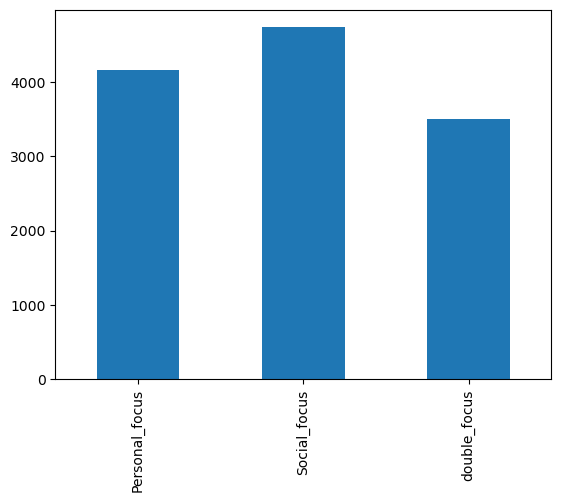

In [105]:
training_data[["Personal_focus", "Social_focus", "double_focus"]].sum().plot(kind='bar')

20


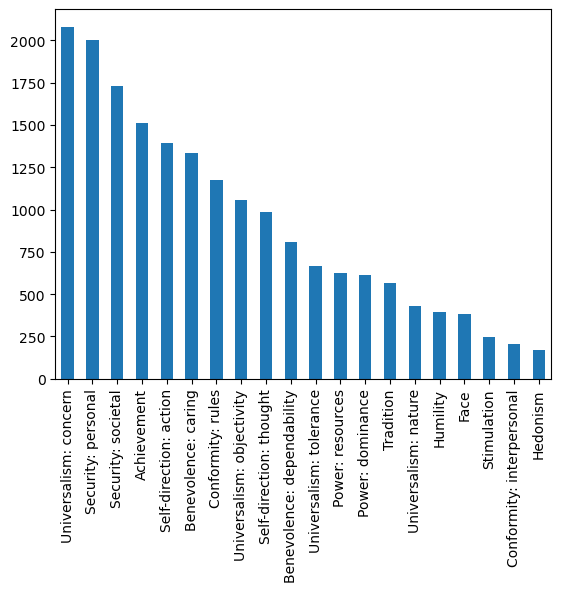

In [47]:
labels_columns= ["Self-direction: thought", "Self-direction: action", "Stimulation",
                 "Hedonism", "Achievement",
                 "Power: dominance",
                 "Power: resources", "Face",
                 "Security: personal", "Security: societal",
                 "Tradition",
                 "Conformity: rules",
                 "Conformity: interpersonal",
                 "Humility",
                 "Benevolence: caring",
                 "Benevolence: dependability","Universalism: concern", 
                 "Universalism: nature", "Universalism: tolerance", "Universalism: objectivity"]

training_data[labels_columns].sum().sort_values(ascending=False).plot(kind='bar')
print(len(labels_columns))

In [17]:
training_data[labels_columns].sum().sort_values(ascending=False).index

Index(['Universalism: concern', 'Security: personal', 'Security: societal',
       'Achievement', 'Self-direction: action', 'Benevolence: caring',
       'Conformity: rules', 'Universalism: objectivity',
       'Self-direction: thought', 'Benevolence: dependability',
       'Universalism: tolerance', 'Power: resources', 'Power: dominance',
       'Tradition', 'Universalism: nature', 'Humility', 'Face', 'Stimulation',
       'Conformity: interpersonal', 'Hedonism'],
      dtype='object')

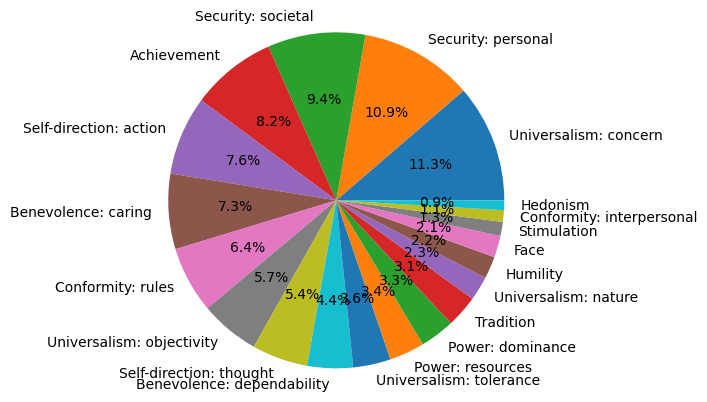

<Figure size 640x480 with 0 Axes>

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie(training_data[labels_columns].sum().sort_values(ascending=False), 
        #labels=labels_columns, 
        labels= training_data[labels_columns].sum().sort_values(ascending=False).index,
        autopct='%1.1f%%', 
        #shadow=True,
         startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.tight_layout()


In [19]:
if 0:
    df=pd.DataFrame(data.data[:,:5])
    df.columns = data.feature_names[:5]

    df['target'] = data.target.astype(str)

    import seaborn as sns;
    import matplotlib.pyplot as plt
    g= sns.pairplot(df,hue = 'target', diag_kind= 'hist',
                 vars=df.columns[:-1],
                 plot_kws=dict(alpha=0.5), 
                 diag_kws=dict(alpha=0.5))
    plt.show()

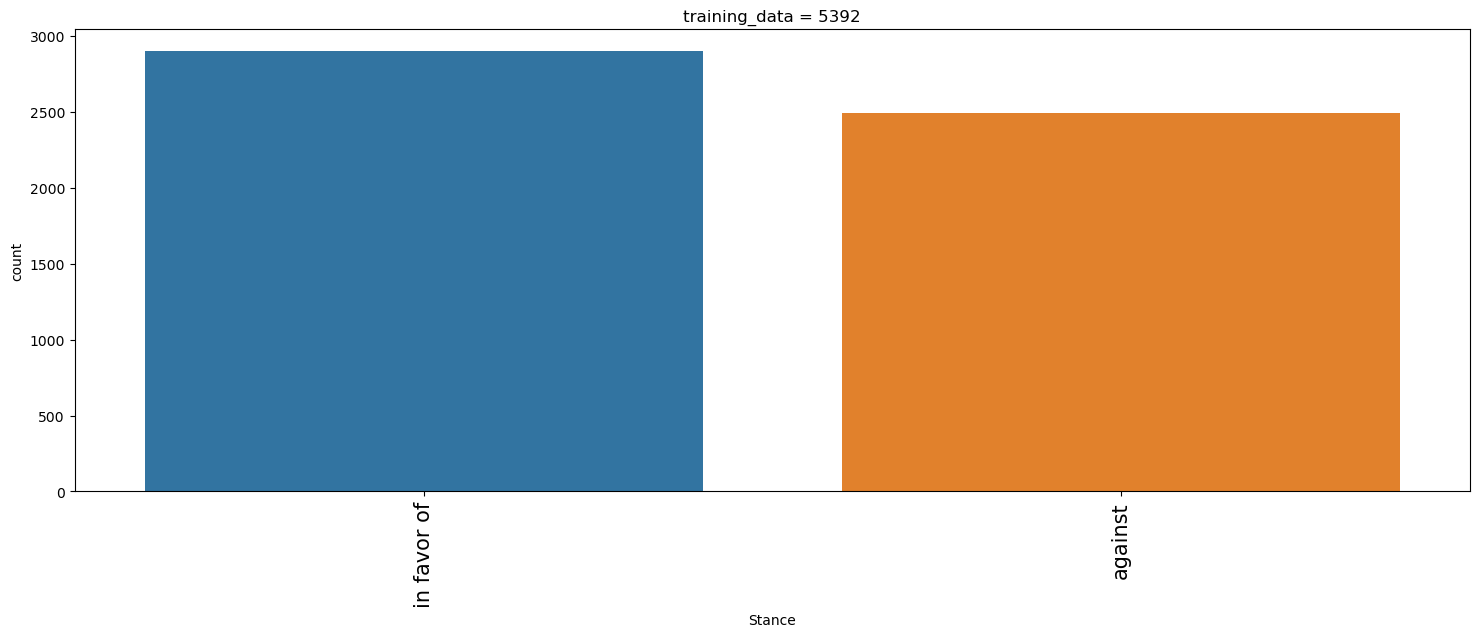

In [21]:

import seaborn as sns


#check countplot for df_dropnomaterial1
largest= 30 # 30 #260
var= 'Stance'
plt.figure(figsize = (18,6));
sns.countplot(x=var,order = training_data[var].value_counts().iloc[:largest].index, data=training_data);
plt.title(f"training_data = {len(training_data)}");
plt.xticks(rotation = 90,fontsize = 15);


In [20]:
# in favor of most common words

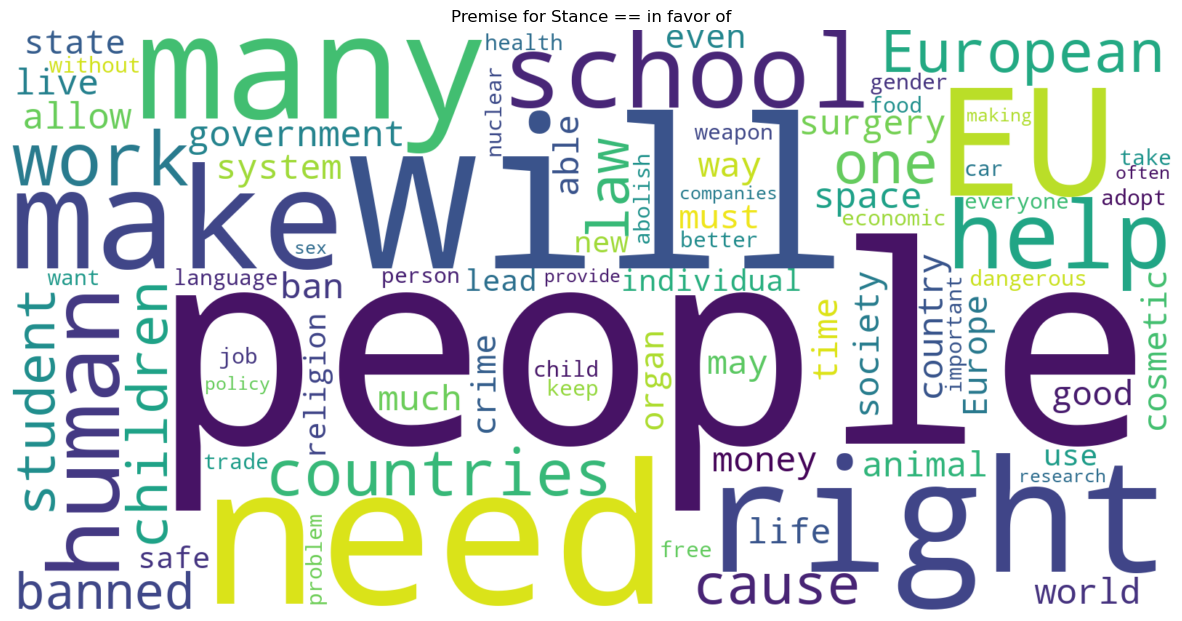

In [28]:
data_pos = training_data[training_data["Stance"]=="in favor of"]["Premise"].values
#print(data_pos);

plt.figure(figsize = (15,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,  background_color ='white', min_font_size = 25,
               collocations=False).generate(" ".join(data_pos))      
plt.axis("off") ;
plt.title("Premise for Stance == in favor of")
plt.imshow(wc , interpolation = 'bilinear');

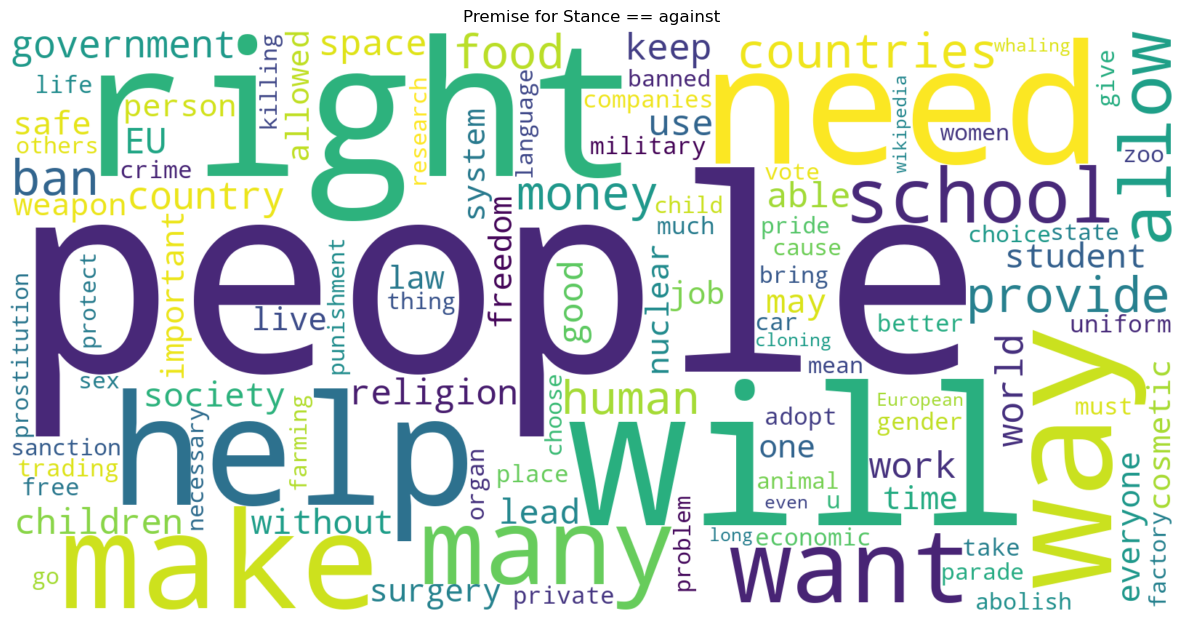

In [27]:
data_aga = training_data[training_data["Stance"]=="against"]["Premise"].values

plt.figure(figsize = (15,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,  background_color ='white', min_font_size = 25,
               collocations=False).generate(" ".join(data_aga))      
plt.axis("off") ;
plt.title("Premise for Stance == against")
plt.imshow(wc , interpolation = 'bilinear');

In [31]:
corr = training_data[labels_columns].corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .format(precision=2))

In [32]:
import plotly.express as px
fig = px.imshow(np.round(corr, 2), zmin=-1, zmax=+1,
                text_auto=True, width=800, height=800)
fig.show()

ModuleNotFoundError: No module named 'plotly'

**DATA UNDERSTANDING**

In [33]:
def tokenize(text):
    tokenized = nltk.word_tokenize(text.lower())
    return tokenized

In [34]:
training_data["tokenized_premise"] = training_data["Premise"].apply(tokenize)
training_data

Argument_ID                                         Conclusion  \
0         A01002                        We should ban human cloning   
1         A01005                            We should ban fast food   
2         A01006        We should end the use of economic sanctions   
3         A01007               We should abolish capital punishment   
4         A01008                      We should ban factory farming   
...          ...                                                ...   
5387      E08016  The EU should integrate the armed forces of it...   
5388      E08017  Food whose production has been subsidized with...   
5389      E08018  Food whose production has been subsidized with...   
5390      E08019  Food whose production has been subsidized with...   
5391      E08020  The EU should integrate the armed forces of it...   

           Stance                                            Premise  \
0     in favor of  we should ban human cloning as it will only ca...   
1     in favor of  fast food should be banned because it is reall...   
2         against  sometimes economic sanctions are the only thin...   
3         against  capital punishment is sometimes the only optio...   
4         against  factory farming allows for the production of c...   
...           ...                                                ...   
5387  in favor of  On the one hand, we have Russia killing countl...   
5388  in favor of  The subsidies were originally intended to ensu...   
5389  in favor of  These products come mainly from large enterpri...   
5390  in favor of  Subsidies often make farmers in recipient coun...   
5391  in favor of  The EU cannot endlessly lean on America or NAT...   

      Self-direction: thought  Self-direction: action  Stimulation  Hedonism  \
0                           0                       0            0         0   
1                           0                       0            0         0   
2                           0                       0            0         0   
3                           0                       0            0         0   
4                           0                       0            0         0   
...                       ...                     ...          ...       ...   
5387                        0                       0            0         0   
5388                        0                       0            0         0   
5389                        0                       0            0         0   
5390                        0                       0            0         0   
5391                        0                       1            0         0   

      Achievement  Power: dominance  Power: resources  Face  \
0               0                 0                 0     0   
1               0                 0                 0     0   
2               0                 1                 0     0   
3               0                 0                 0     0   
4               0                 0                 0     0   
...           ...               ...               ...   ...   
5387            1                 1                 0     0   
5388            0                 0                 0     0   
5389            0                 0                 0     0   
5390            0                 0                 0     0   
5391            0                 1                 0     0   

      Security: personal  Security: societal  Tradition  Conformity: rules  \
0                      0                   1          0                  0   
1                      1                   0          0                  0   
2                      0                   1          0                  0   
3                      0                   1          0                  1   
4                      1                   0          0                  0   
...                  ...                 ...        ...                ...   
5387                   

In [35]:
labels_col = ["Self-direction: thought", "Self-direction: action", "Stimulation", "Hedonism", "Achievement", "Power: dominance", "Power: resources", "Face", "Security: personal", "Security: societal", "Tradition", "Conformity: rules", "Conformity: interpersonal", "Humility", "Benevolence: caring", "Benevolence: dependability", "Universalism: concern", "Universalism: nature", "Universalism: tolerance", "Universalism: objectivity"]

In [36]:
def get_freq_dist(text):
    freqs = nltk.FreqDist(text)
    return freqs

In [37]:
label2freq = {}
for label in labels_col:
    text = []
    for i, row in training_data.iterrows():
        if label in row.labels:
            text.extend(row.tokenized_premise)
    label2freq[label] = get_freq_dist(text)


# label2freq


In [38]:
label2freq["Benevolence: caring"].most_common(20)

[('.', 1331),
 ('the', 1232),
 ('to', 1198),
 ('and', 933),
 (',', 649),
 ('of', 647),
 ('a', 630),
 ('is', 572),
 ('be', 466),
 ('for', 445),
 ('in', 443),
 ('should', 402),
 ('it', 390),
 ('are', 369),
 ('we', 367),
 ('people', 364),
 ('that', 321),
 ('not', 305),
 ('they', 246),
 ('their', 234)]

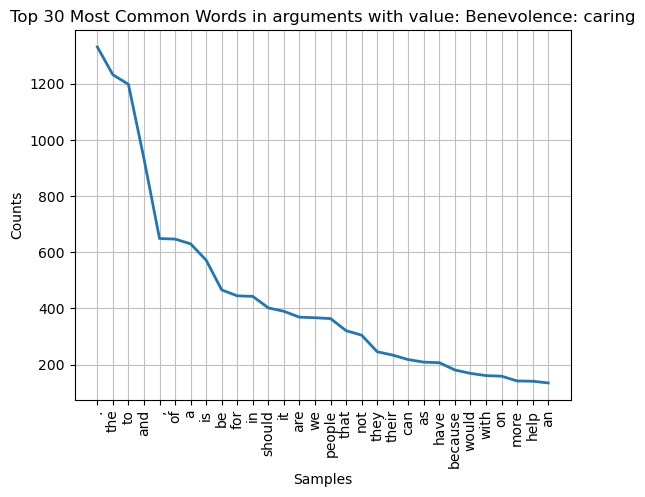

<AxesSubplot: title={'center': 'Top 30 Most Common Words in arguments with value: Benevolence: caring'}, xlabel='Samples', ylabel='Counts'>

In [39]:
label2freq["Benevolence: caring"].plot(30, title='Top 30 Most Common Words in arguments with value: Benevolence: caring')

**DATA CLEANING** 

*Now we look at the Freq Dist without stopwords or punctuation*

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fabrizio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
stop_words = set(stopwords.words('english'))

In [42]:
def filter_tokens(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return filtered_tokens

In [43]:
training_data["no_stopwords_premise"]=training_data["tokenized_premise"].apply(filter_tokens)
# training_data

In [48]:
training_data["no_stopwords_premise"]

0       [ban, human, cloning, cause, huge, issues, bun...
1       [fast, food, banned, really, bad, health, costly]
2       [sometimes, economic, sanctions, thing, get, c...
3       [capital, punishment, sometimes, option, keep,...
4       [factory, farming, allows, production, cheap, ...
                              ...                        
5387    [one, hand, russia, killing, countless, ukrain...
5388    [subsidies, originally, intended, ensure, secu...
5389    [products, come, mainly, large, enterprises, n...
5390    [subsidies, often, make, farmers, recipient, c...
5391    [eu, endlessly, lean, america, nato, america, ...
Name: no_stopwords_premise, Length: 5392, dtype: object

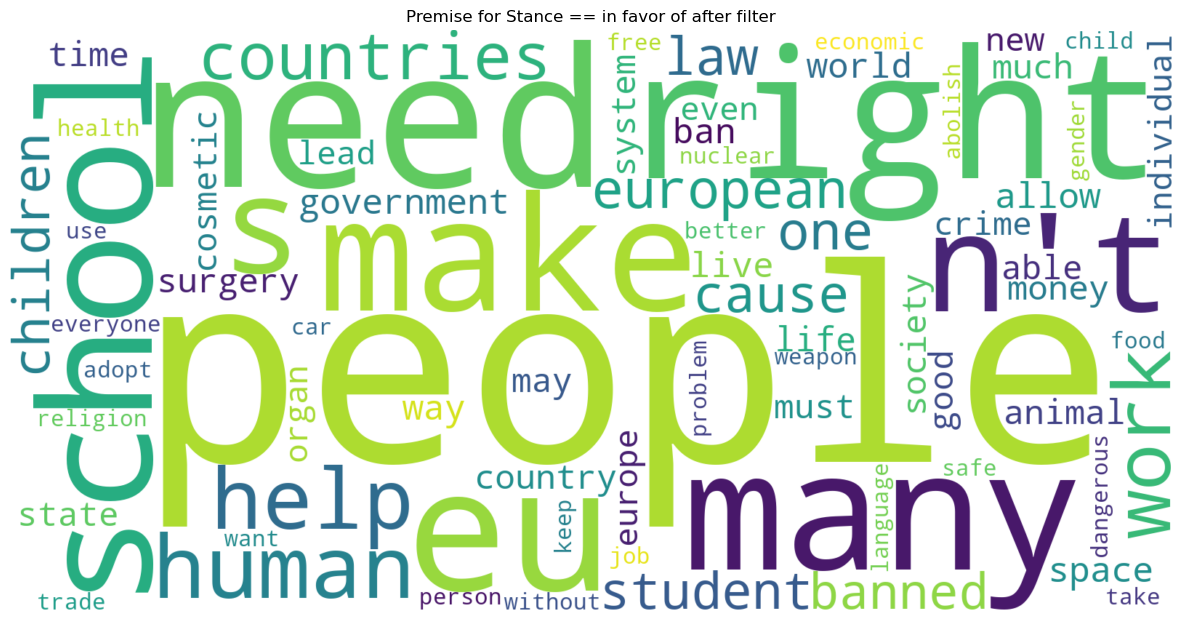

In [57]:
data_fav_filt = training_data[training_data["Stance"]=="in favor of"]["no_stopwords_premise"].values

flat_data_fav_filt = [item for sublist in data_fav_filt for item in sublist]

#print(type(flat_data_aga_filt))
#print(flat_data_aga_filt)


plt.figure(figsize = (15,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,  background_color ='white', min_font_size = 25,
               collocations=False).generate(" ".join(flat_data_fav_filt))      
plt.axis("off") ;
plt.title("Premise for Stance == in favor of after filter")
plt.imshow(wc , interpolation = 'bilinear');

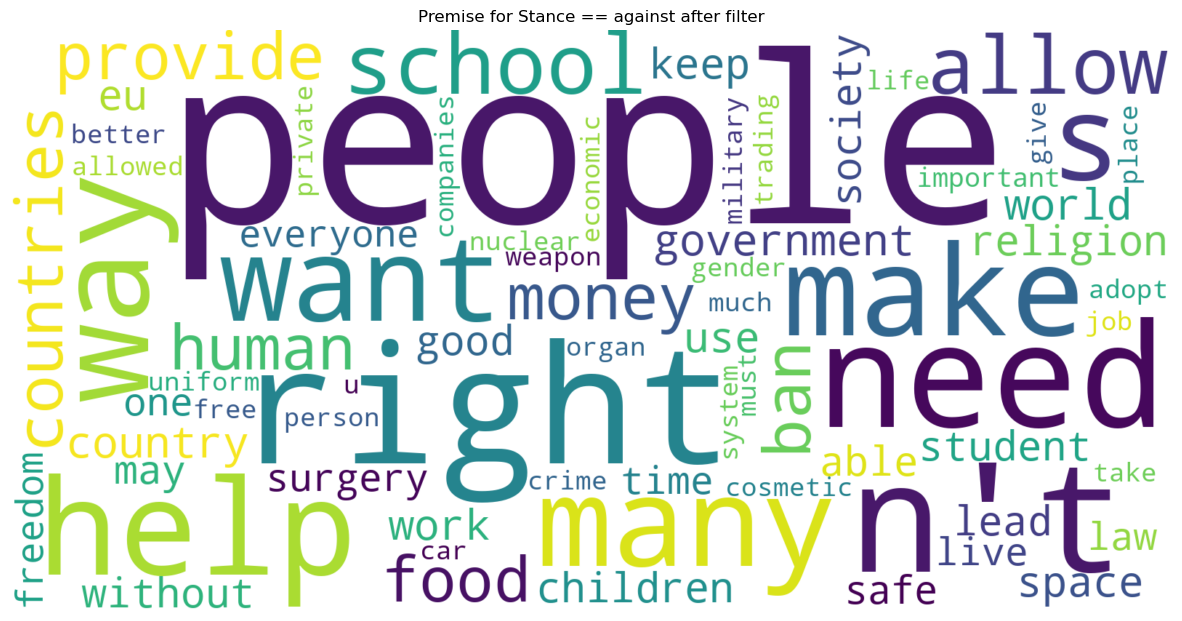

In [56]:
data_aga_filt = training_data[training_data["Stance"]=="against"]["no_stopwords_premise"].values

flat_data_aga_filt = [item for sublist in data_aga_filt for item in sublist]

#print(type(flat_data_aga_filt))
#print(flat_data_aga_filt)


plt.figure(figsize = (15,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,  background_color ='white', min_font_size = 25,
               collocations=False).generate(" ".join(flat_data_aga_filt))      
plt.axis("off") ;
plt.title("Premise for Stance == against after filter")
plt.imshow(wc , interpolation = 'bilinear');

In [59]:
no_sw_label2freq = {}
for label in labels_col:
    text = []
    for i, row in training_data.iterrows():
        if label in row.labels:
            text.extend(row.no_stopwords_premise)
    no_sw_label2freq[label] = get_freq_dist(text)

no_sw_label2freq

{'Self-direction: thought': FreqDist({'people': 254, 'right': 106, 'religion': 97, 'would': 92, 'school': 82, 'freedom': 81, 'rights': 79, 'want': 72, "n't": 72, 'research': 58, ...}),
 'Self-direction: action': FreqDist({'people': 424, 'right': 208, 'would': 151, 'want': 129, "n't": 107, 'freedom': 95, "'s": 92, 'need': 91, 'school': 80, 'eu': 79, ...}),
 'Stimulation': FreqDist({'people': 85, 'would': 25, 'world': 21, 'children': 20, 'human': 19, 'need': 18, 'child': 17, 'want': 17, 'make': 17, 'allow': 17, ...}),
 'Hedonism': FreqDist({'people': 72, 'many': 20, 'cannabis': 19, 'surgery': 19, 'food': 18, 'would': 18, 'children': 18, 'cosmetic': 17, 'child': 16, 'fast': 14, ...}),
 'Achievement': FreqDist({'people': 334, 'would': 173, 'need': 119, "n't": 114, 'many': 109, 'work': 100, 'help': 100, 'eu': 93, 'make': 89, 'could': 83, ...}),
 'Power: dominance': FreqDist({'people': 117, 'would': 95, 'eu': 79, 'countries': 51, 'european': 51, 'need': 50, "'s": 50, 'way': 42, 'must': 42, '

In [60]:
no_sw_label2freq["Tradition"].most_common(30)

[('people', 126),
 ('religion', 88),
 ('right', 87),
 ('school', 60),
 ('prayer', 54),
 ('many', 48),
 ("n't", 47),
 ('would', 47),
 ('want', 44),
 ('freedom', 42),
 ('language', 41),
 ('church', 38),
 ("'s", 35),
 ('must', 35),
 ('countries', 34),
 ('ban', 34),
 ('country', 33),
 ('human', 32),
 ('need', 32),
 ('sex', 32),
 ('atheism', 31),
 ('work', 31),
 ('scientology', 31),
 ('eu', 30),
 ('adopt', 29),
 ('one', 29),
 ('way', 28),
 ('believe', 28),
 ('values', 27),
 ('europe', 27)]

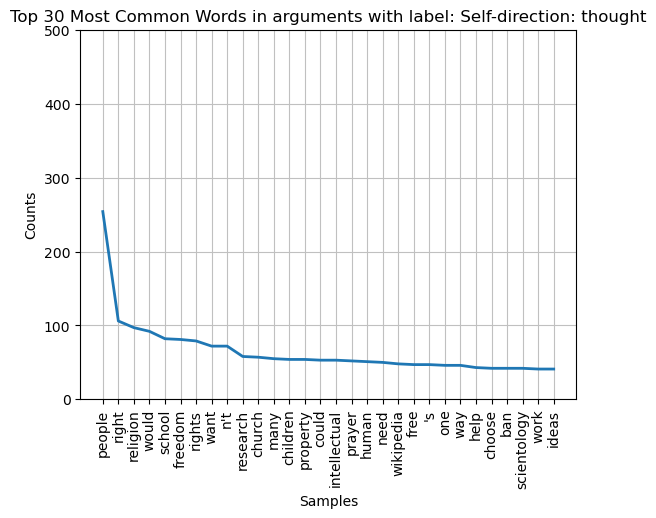

/tmp/ipykernel_40688/1846239856.py:4: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,500)


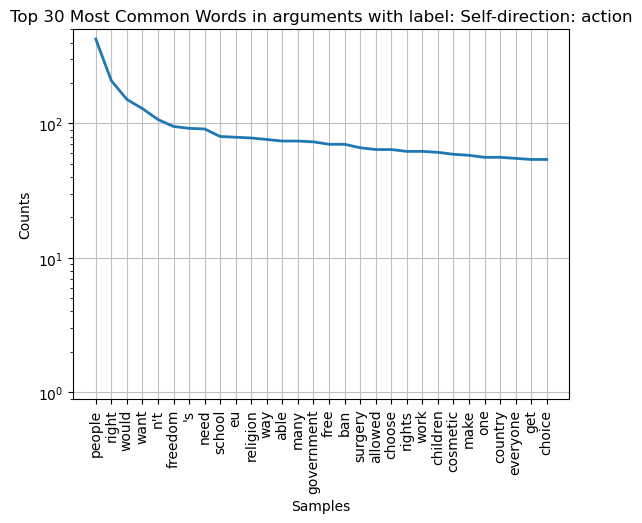

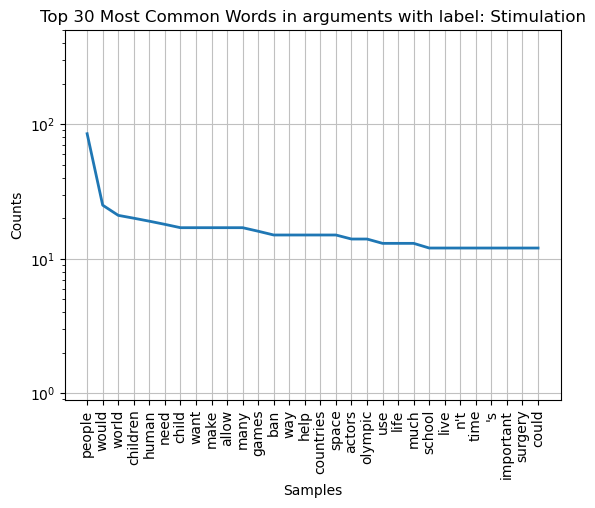

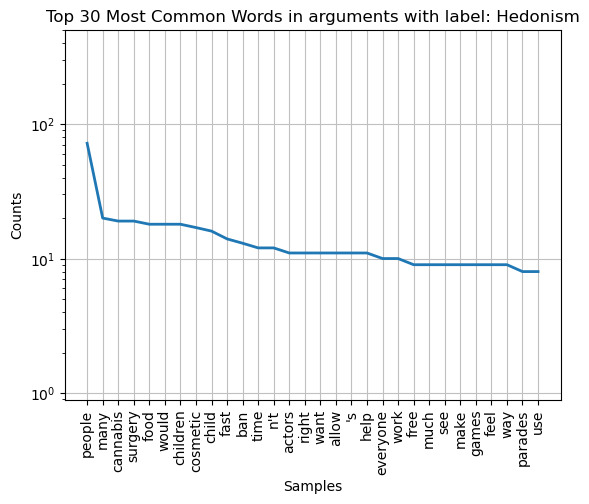

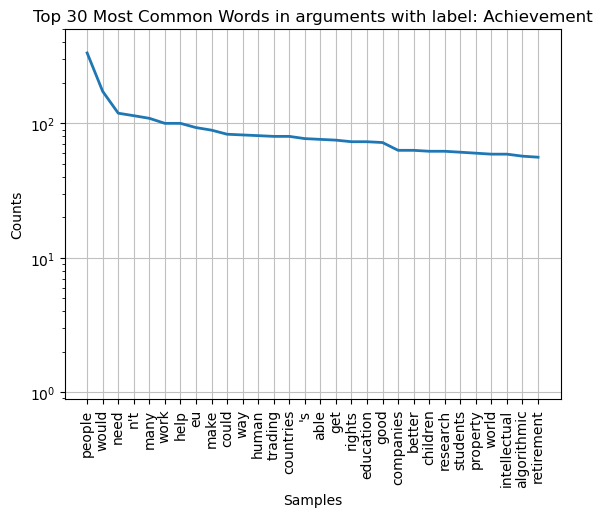

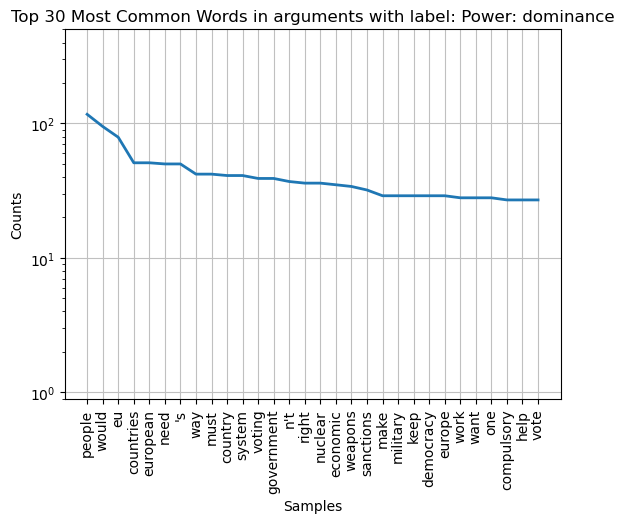

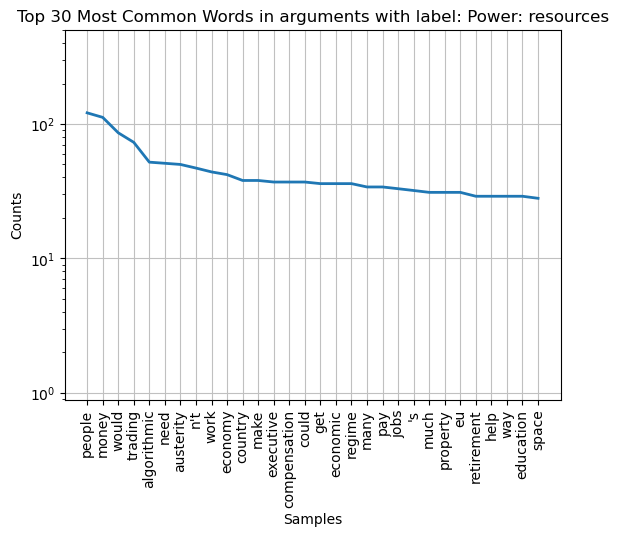

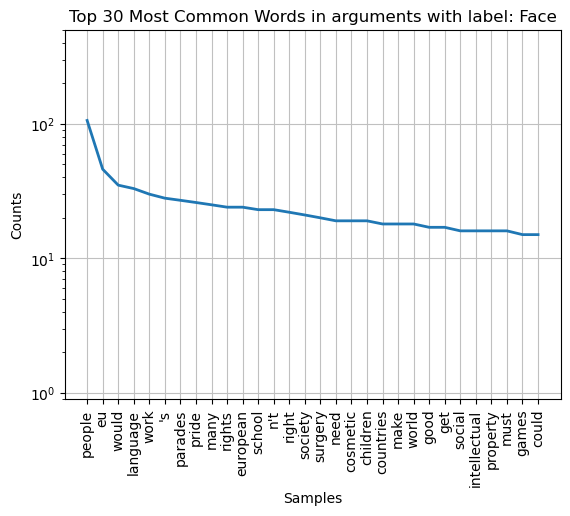

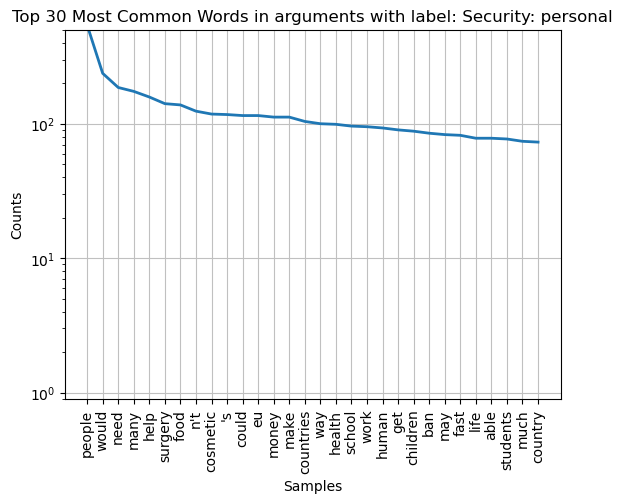

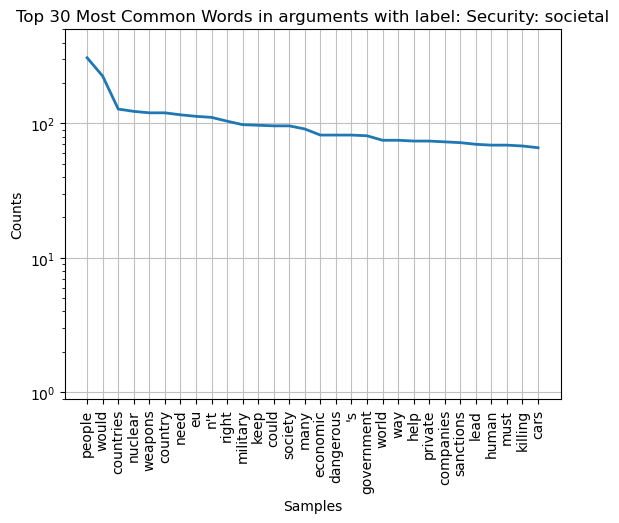

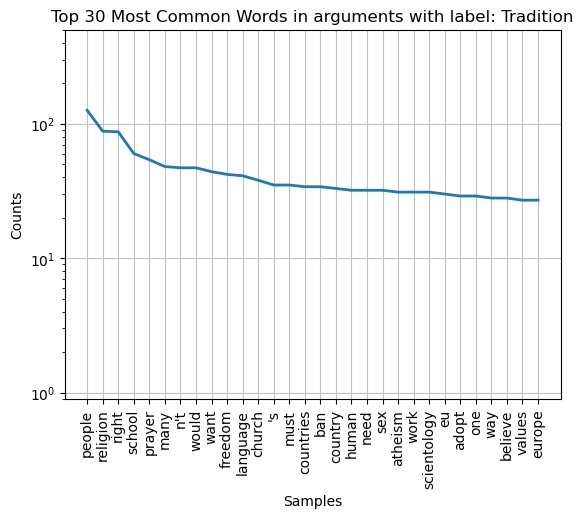

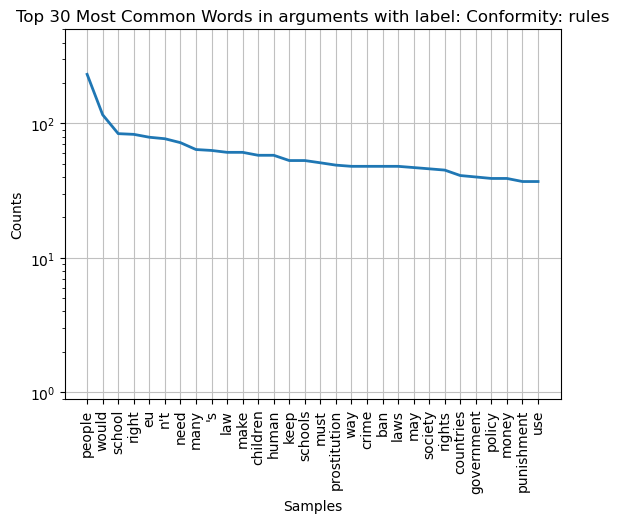

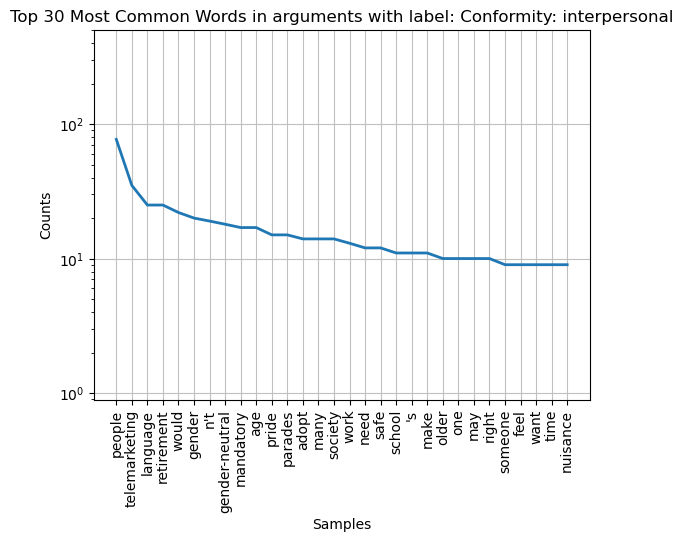

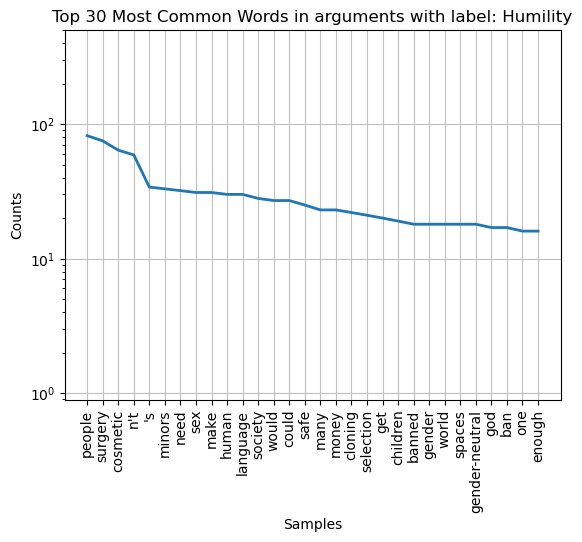

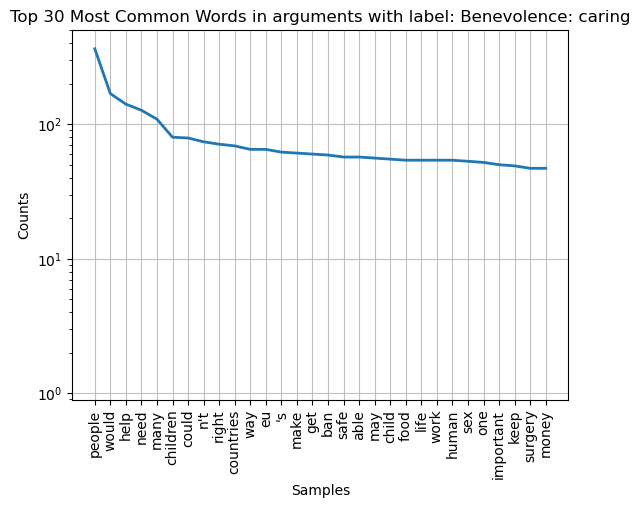

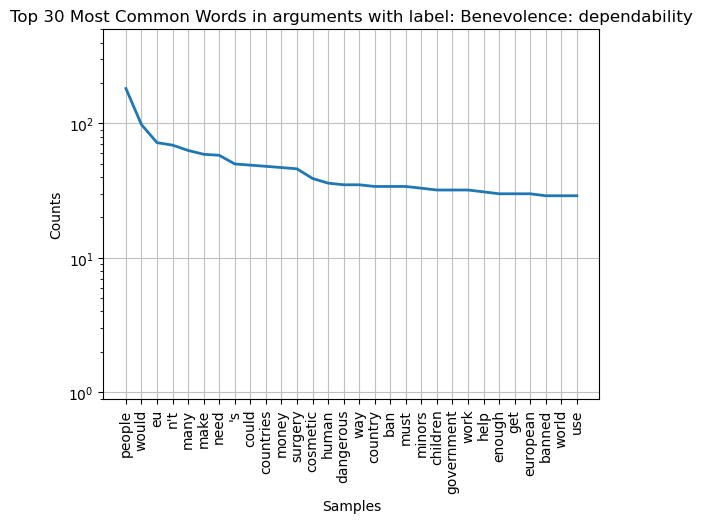

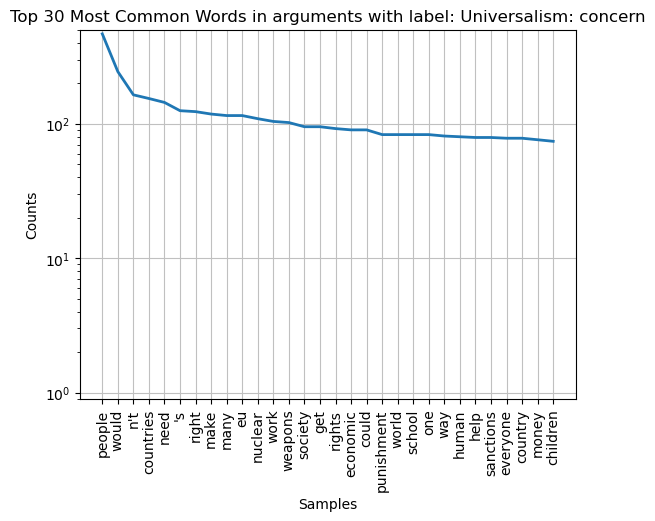

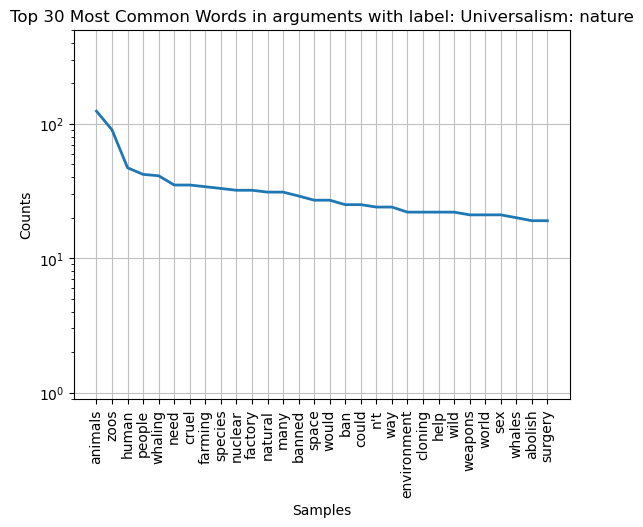

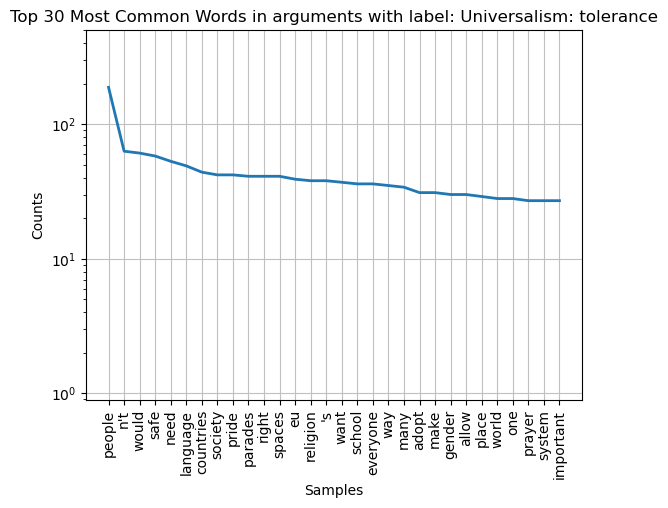

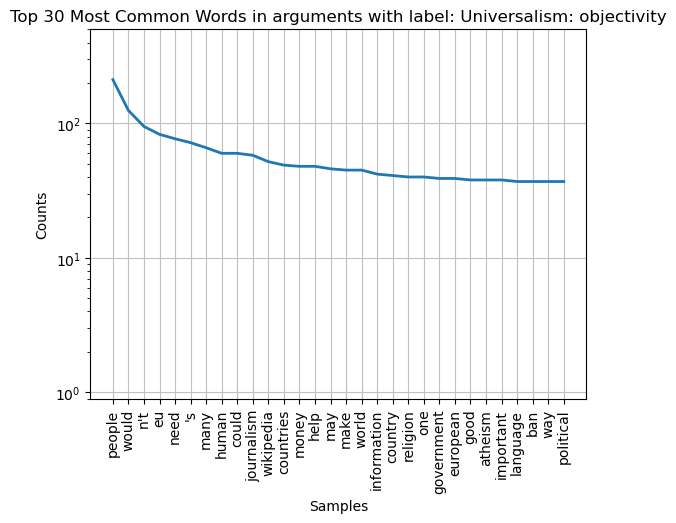

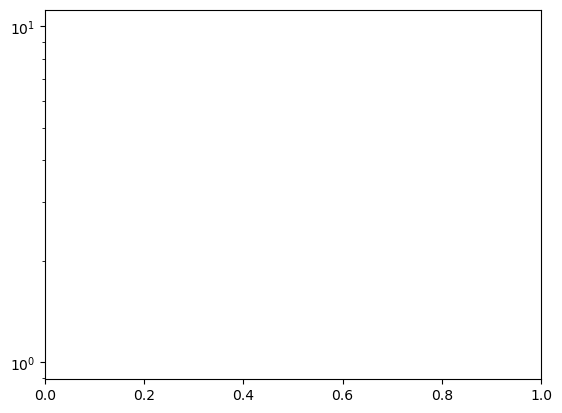

In [66]:
for i, label in enumerate(labels_col):
    #label = "Tradition"
    
    plt.ylim(0,500)
    no_sw_label2freq[label].plot(30, title=f'Top 30 Most Common Words in arguments with label: {label}')
    
    plt.yscale('log')
    
    

In [ ]:
len(no_sw_label2freq[label])

In [ ]:

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))


type(no_sw_label2freq[label])


labels_col = ["Self-direction: thought", "Self-direction: action", "Stimulation", "Hedonism", "Achievement", 
              "Power: dominance", "Power: resources", "Face", 
              "Security: personal", "Security: societal", "Tradition", 
              "Conformity: rules", "Conformity: interpersonal", "Humility", 
              "Benevolence: caring", "Benevolence: dependability", 
              "Universalism: concern", 
              "Universalism: nature", "Universalism: tolerance", "Universalism: objectivity"]


if 0:
    label ='Tradition'
    data = pd.DataFrame({'Word': no_sw_label2freq[label].keys(), 'Count': no_sw_label2freq[label].values()})
    Trad_30mc = list(data.sort_values(by='Count', ascending=False)[0:30]["Word"].values)

    label ='Benevolence: caring'
    data = pd.DataFrame({'Word': no_sw_label2freq[label].keys(), 'Count': no_sw_label2freq[label].values()})
    Bn_ca_30mc = list(data.sort_values(by='Count', ascending=False)[0:30]["Word"].values)

    label ='Benevolence: dependability'
    data = pd.DataFrame({'Word': no_sw_label2freq[label].keys(), 'Count': no_sw_label2freq[label].values()})
    Bn_de_30mc = list(data.sort_values(by='Count', ascending=False)[0:30]["Word"].values)


    label ='Universalism: objectivity'
    data = pd.DataFrame({'Word': no_sw_label2freq[label].keys(), 'Count': no_sw_label2freq[label].values()})
    Un_ob_30mc = list(data.sort_values(by='Count', ascending=False)[0:30]["Word"].values)

    label ='Hedonism'
    data = pd.DataFrame({'Word': no_sw_label2freq[label].keys(), 'Count': no_sw_label2freq[label].values()})
    Hedo_30mc = list(data.sort_values(by='Count', ascending=False)[0:30]["Word"].values)



    #print(jaccard_similarity(Trad_30mc, Bn_ca_30mc))
    #print(jaccard_similarity(Trad_30mc, Un_ob_30mc))
    #print(jaccard_similarity(Trad_30mc, Hedo_30mc))
    #print(jaccard_similarity(Un_ob_30mc, Bn_ca_30mc))
    #print(jaccard_similarity(Bn_de_30mc, Bn_ca_30mc))


first_label = "Self-direction: thought"
JC_sim_Se_th = []
for idx_lab, ext_lab in enumerate(labels_col):
    #print(ext_lab)
    #print(first_label)

    data_fl = pd.DataFrame({'Word': no_sw_label2freq[first_label].keys(), 'Count': no_sw_label2freq[first_label].values()})
    data_ext = pd.DataFrame({'Word': no_sw_label2freq[ext_lab].keys(), 'Count': no_sw_label2freq[ext_lab].values()})

    first_30mc = list(data_fl.sort_values(by='Count', ascending=False)[0:30]["Word"].values)
    ext_30mc = list(data_ext.sort_values(by='Count', ascending=False)[0:30]["Word"].values)

    #print(first_30mc)
    #print(ext_30mc)

    JC_sim_temp = jaccard_similarity(first_30mc, ext_30mc)
    JC_sim_Se_th.append(JC_sim_temp)
    #print(JC_sim_temp)
    
JC_sim_Se_th


dict_keys(['three', 'strike', 'laws', 'cause', 'young', 'people', 'put', 'away', 'life', 'without', 'chance', 'straight', 'children', 'grown', 'truly', 'formed', 'adult', 'looks', 'cosmetic', 'surgery', 'child', 'banned', 'make', 'informed', 'choice', 'bodies', 'whim', 'legalize', 'prostitution', 'regulated', 'meaning', 'females', 'safer', 'algorithms', 'may', '100', 'accurate', 'reflect', 'situation', 'real', 'market', 'organ', 'trade', 'currently', 'punished', 'obeying', 'law', 'purchasing', 'organs', 'form', 'longer', 'wait', 'times', 'need', 'donate', 'legalizing', 'would', 'good', 'thing', 'wikipedia', 'biased', 'opinions', 'topics', 'misinform', 'general', 'public', 'therefore', 'subsidized', 'cannabis', 'shown', 'alcohol', 'less', 'addictive', 'reason', 'keep', 'illegal', 'substance', 'autonomous', 'cars', 'take', 'jobs', 'thousands', 'around', 'world', 'removing', 'function', 'drivers', 'capital', 'punishment', 'proven', 'ineffective', 'reducing', 'crime', 'rates', 'embryonic',

**TEXT ANNOTATION**